# Statistics for ZRS Paper

## 1.0 Load Dependencies and Data

In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, median_abs_deviation, f_oneway, ttest_ind, kruskal, wilcoxon, mannwhitneyu, ks_2samp
from itertools import combinations
from statannotations.Annotator import Annotator
from statannotations.stats.StatTest import StatTest
from statannotations.stats.utils import return_results
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp

In [2]:
df = pd.DataFrame(pd.read_csv('Combined_Results.csv'))

## 2.0 Descriptive Statistics

### 2.1 Create a new Dataframe with the desired columns

In [3]:
# Make df copy with only the columns necessary for method comparison
df_c1 = df.copy()
columns = ['e_name','e_mut',        
        # 'rgb_rgb_limb_i_sum_norm', 'rgb_rgb_post_i_sum_norm', 'rgb_rgb_zpa_i_sum_norm',
        # 'g_rgb_limb_i_sum_norm', 'g_rgb_post_i_sum_norm', 'g_rgb_zpa_i_sum_norm',
        'g_r_limb_i_sum_norm', 
        'g_r_post_i_sum_norm', 
        'g_r_zpa_i_sum_norm',
        # 'rgb_rgb_limb_i_mean_norm', 'rgb_rgb_post_i_mean_norm', 'rgb_rgb_zpa_i_mean_norm',
        # 'g_rgb_limb_i_mean_norm', 'g_rgb_post_i_mean_norm', 'g_rgb_zpa_i_mean_norm',
        # 'g_r_limb_i_mean_norm', 'g_r_post_i_mean_norm', 'g_r_zpa_i_mean_norm',
        # 'rgb_rgb_limb_i_sum_norm_bg_sub', 'rgb_rgb_post_i_sum_norm_bg_sub', 'rgb_rgb_zpa_i_sum_norm_bg_sub',
        # 'g_rgb_limb_i_sum_norm_bg_sub', 'g_rgb_post_i_sum_norm_bg_sub', 'g_rgb_zpa_i_sum_norm_bg_sub',
        # 'g_r_limb_i_sum_norm_bg_sub', 'g_r_post_i_sum_norm_bg_sub', 'g_r_zpa_i_sum_norm_bg_sub',
        # 'rgb_rgb_limb_i_mean_norm_bg_sub', 'rgb_rgb_post_i_mean_norm_bg_sub', 'rgb_rgb_zpa_i_mean_norm_bg_sub',
        # 'g_rgb_limb_i_mean_norm_bg_sub', 'g_rgb_post_i_mean_norm_bg_sub', 'g_rgb_zpa_i_mean_norm_bg_sub',
        # 'g_r_limb_i_mean_norm_bg_sub', 'g_r_post_i_mean_norm_bg_sub', 'g_r_zpa_i_mean_norm_bg_sub'
        ]
df_raw = df_c1[columns]

# List of numerical columns for the following analysis
num_columns=[
        # 'rgb_rgb_limb_i_sum_norm', 'rgb_rgb_post_i_sum_norm', 'rgb_rgb_zpa_i_sum_norm',
        # 'g_rgb_limb_i_sum_norm', 'g_rgb_post_i_sum_norm', 'g_rgb_zpa_i_sum_norm',
        'g_r_limb_i_sum_norm', 
        'g_r_post_i_sum_norm', 
        'g_r_zpa_i_sum_norm',
        # 'rgb_rgb_limb_i_mean_norm', 'rgb_rgb_post_i_mean_norm', 'rgb_rgb_zpa_i_mean_norm',
        # 'g_rgb_limb_i_mean_norm', 'g_rgb_post_i_mean_norm', 'g_rgb_zpa_i_mean_norm',
        # 'g_r_limb_i_mean_norm', 'g_r_post_i_mean_norm', 'g_r_zpa_i_mean_norm',
        # 'rgb_rgb_limb_i_sum_norm_bg_sub', 'rgb_rgb_post_i_sum_norm_bg_sub', 'rgb_rgb_zpa_i_sum_norm_bg_sub',
        # 'g_rgb_limb_i_sum_norm_bg_sub', 'g_rgb_post_i_sum_norm_bg_sub', 'g_rgb_zpa_i_sum_norm_bg_sub',
        # 'g_r_limb_i_sum_norm_bg_sub', 'g_r_post_i_sum_norm_bg_sub', 'g_r_zpa_i_sum_norm_bg_sub',
        # 'rgb_rgb_limb_i_mean_norm_bg_sub', 'rgb_rgb_post_i_mean_norm_bg_sub', 'rgb_rgb_zpa_i_mean_norm_bg_sub',
        # 'g_rgb_limb_i_mean_norm_bg_sub', 'g_rgb_post_i_mean_norm_bg_sub', 'g_rgb_zpa_i_mean_norm_bg_sub',
        # 'g_r_limb_i_mean_norm_bg_sub', 'g_r_post_i_mean_norm_bg_sub', 'g_r_zpa_i_mean_norm_bg_sub',
        ]

### 2.2 Check distribution of raw data with histograms and Shapiro-Wilk test 

Grouped by data collection method

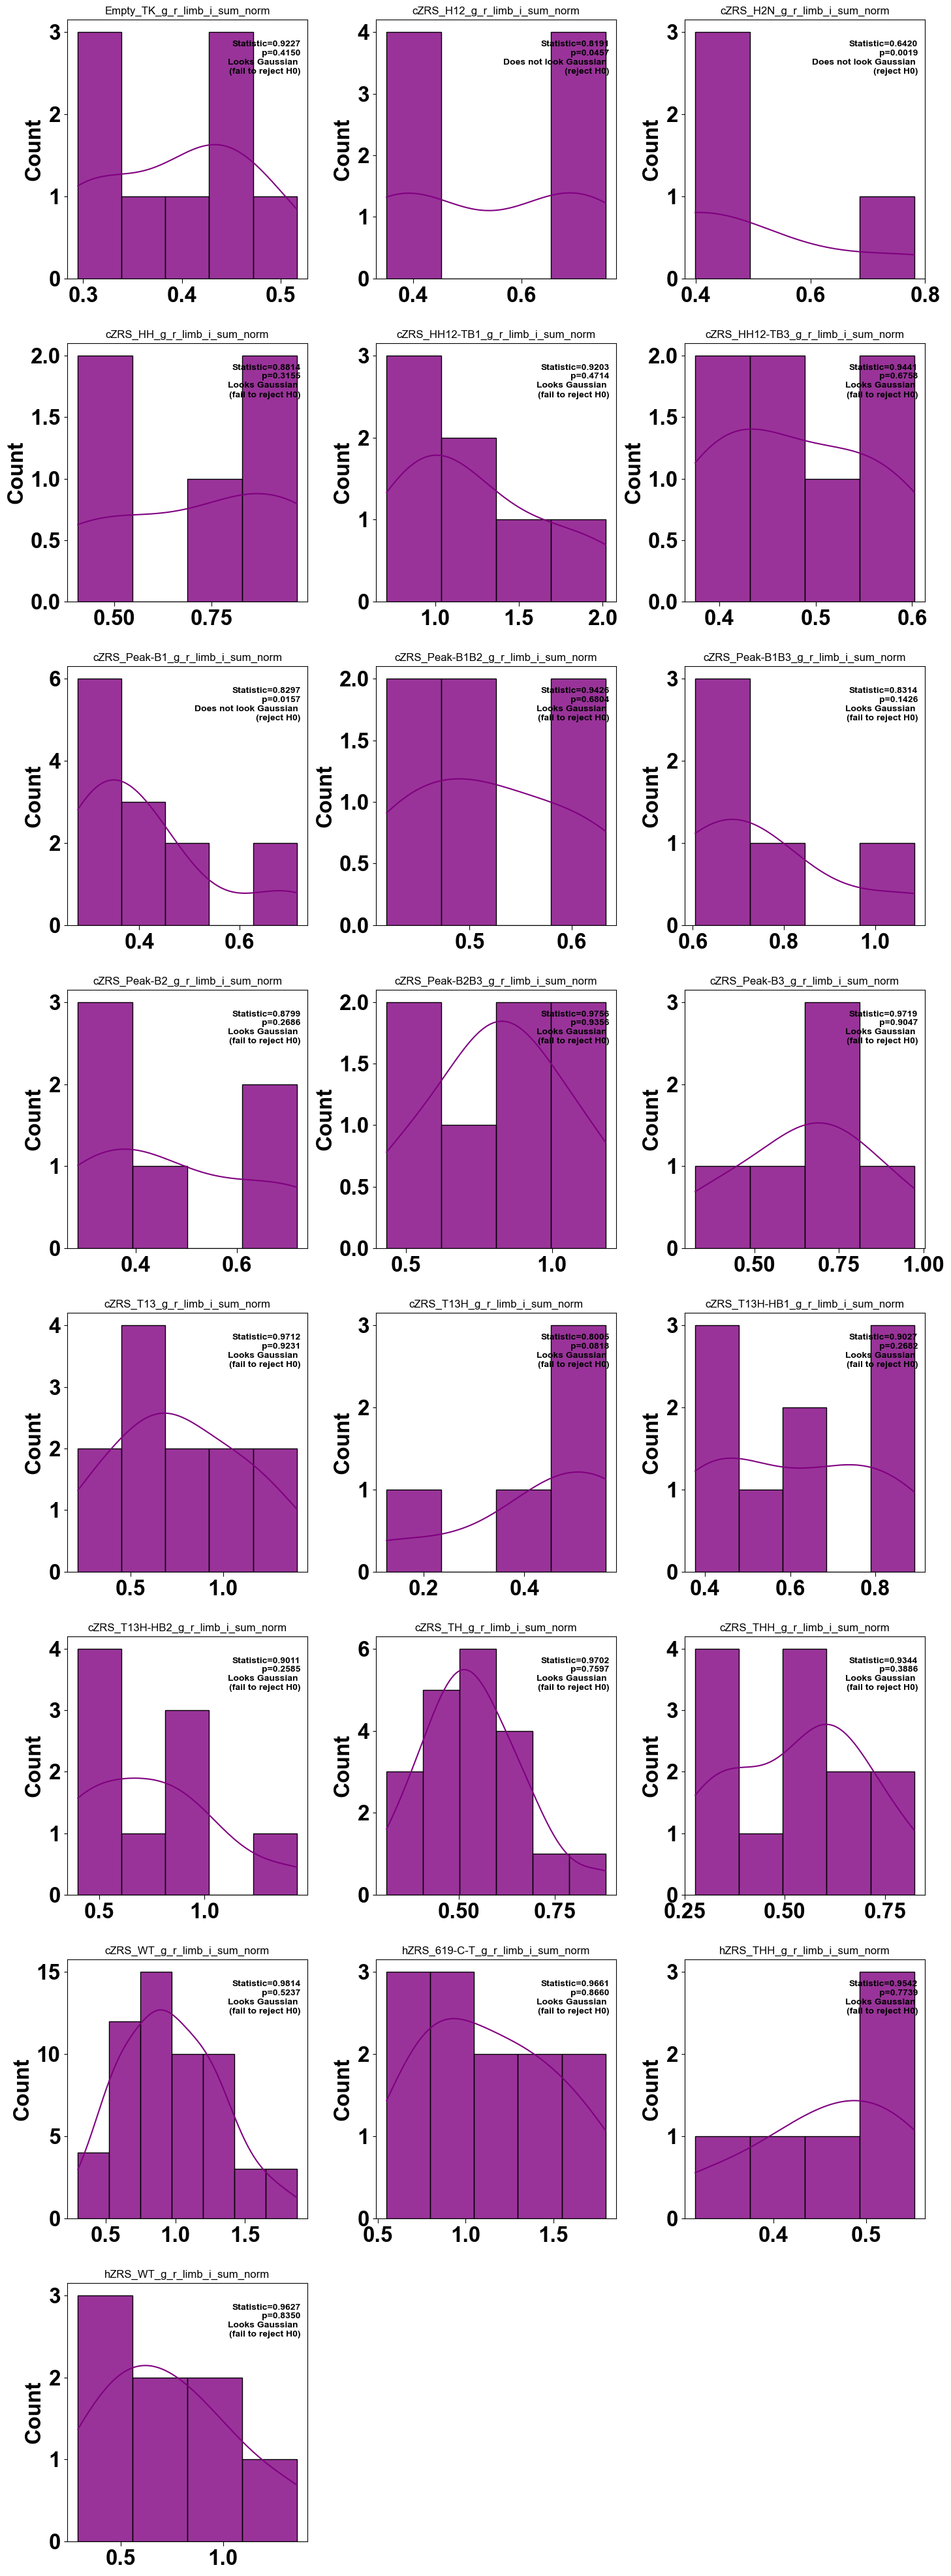

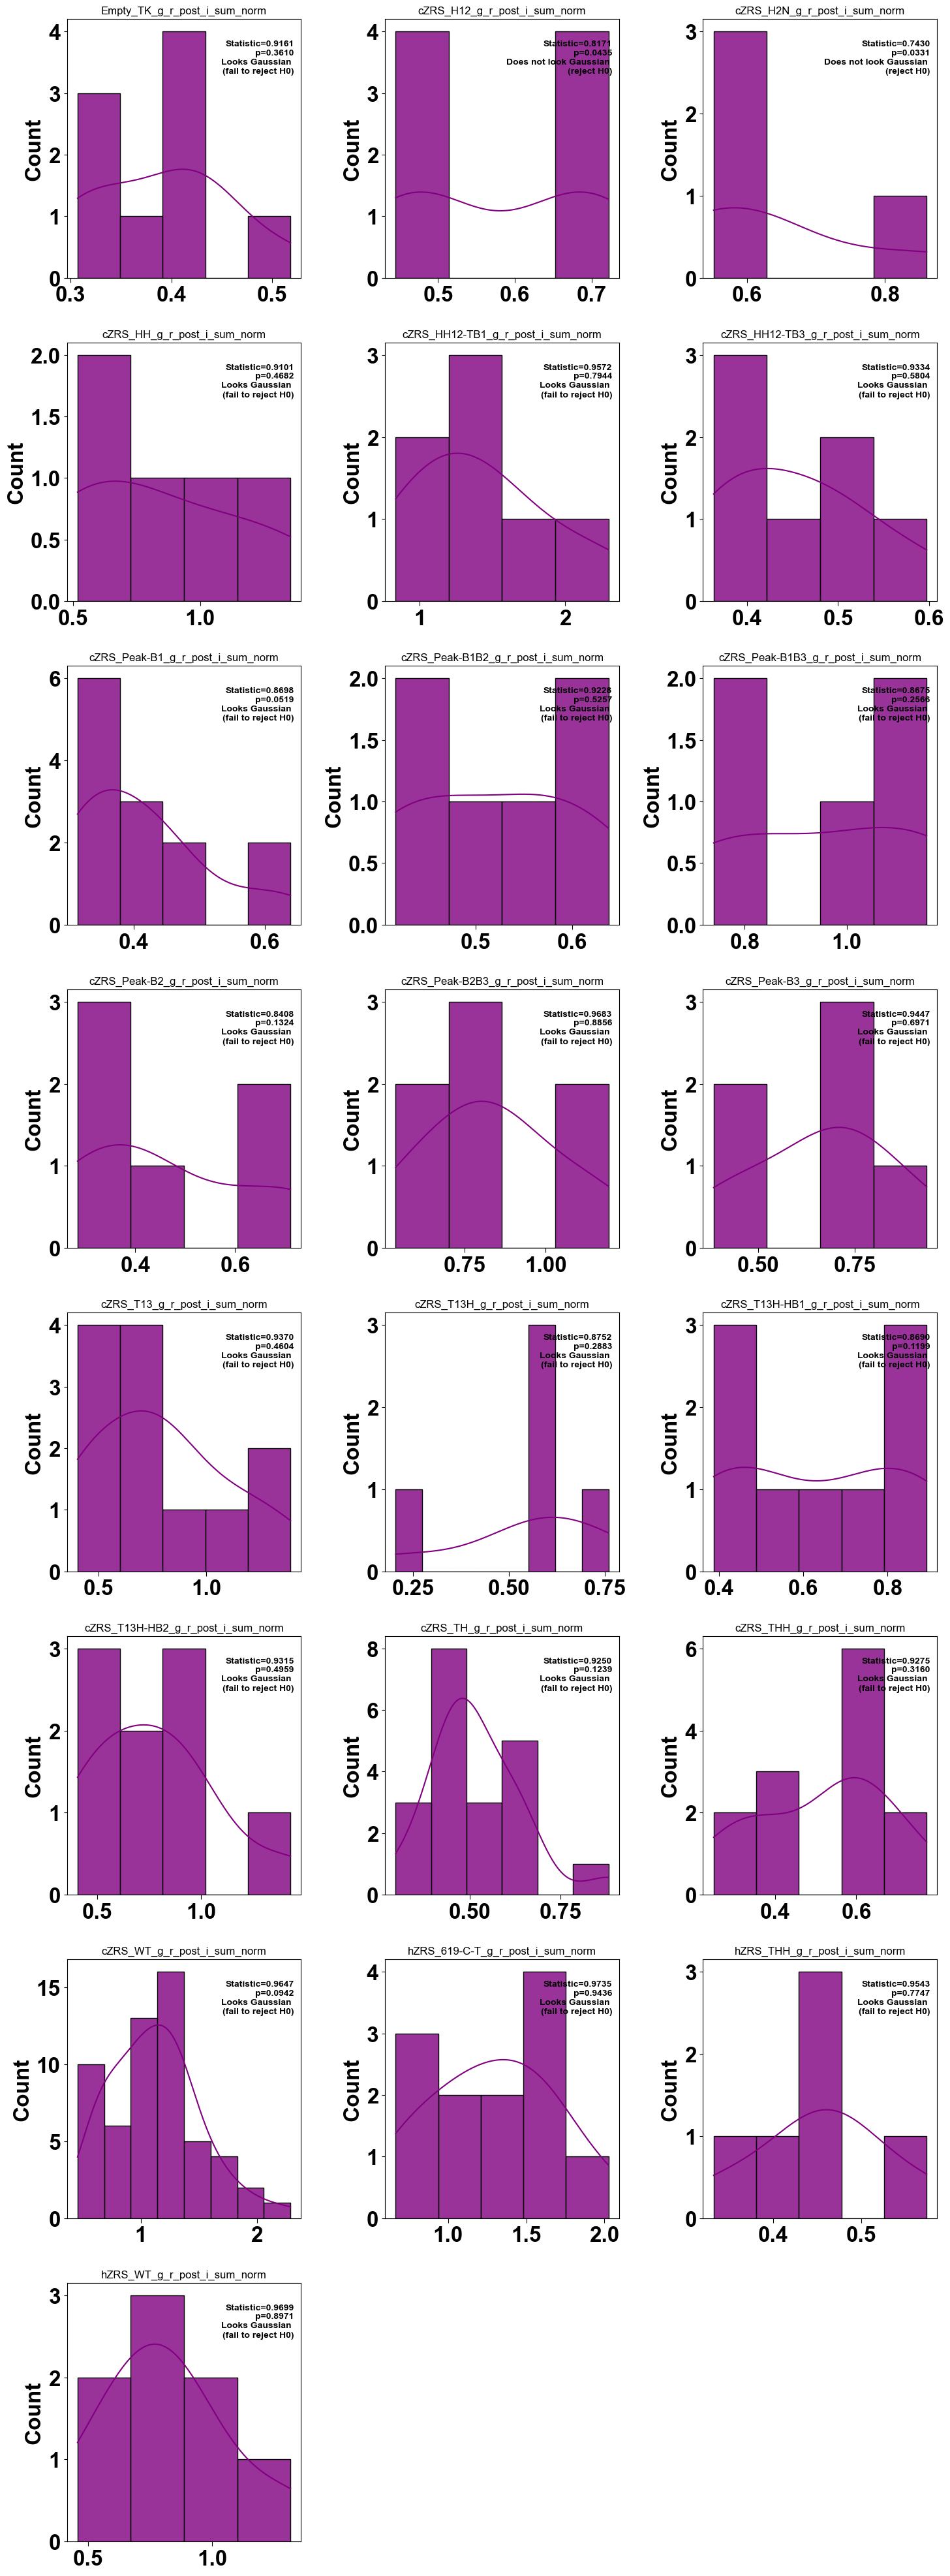

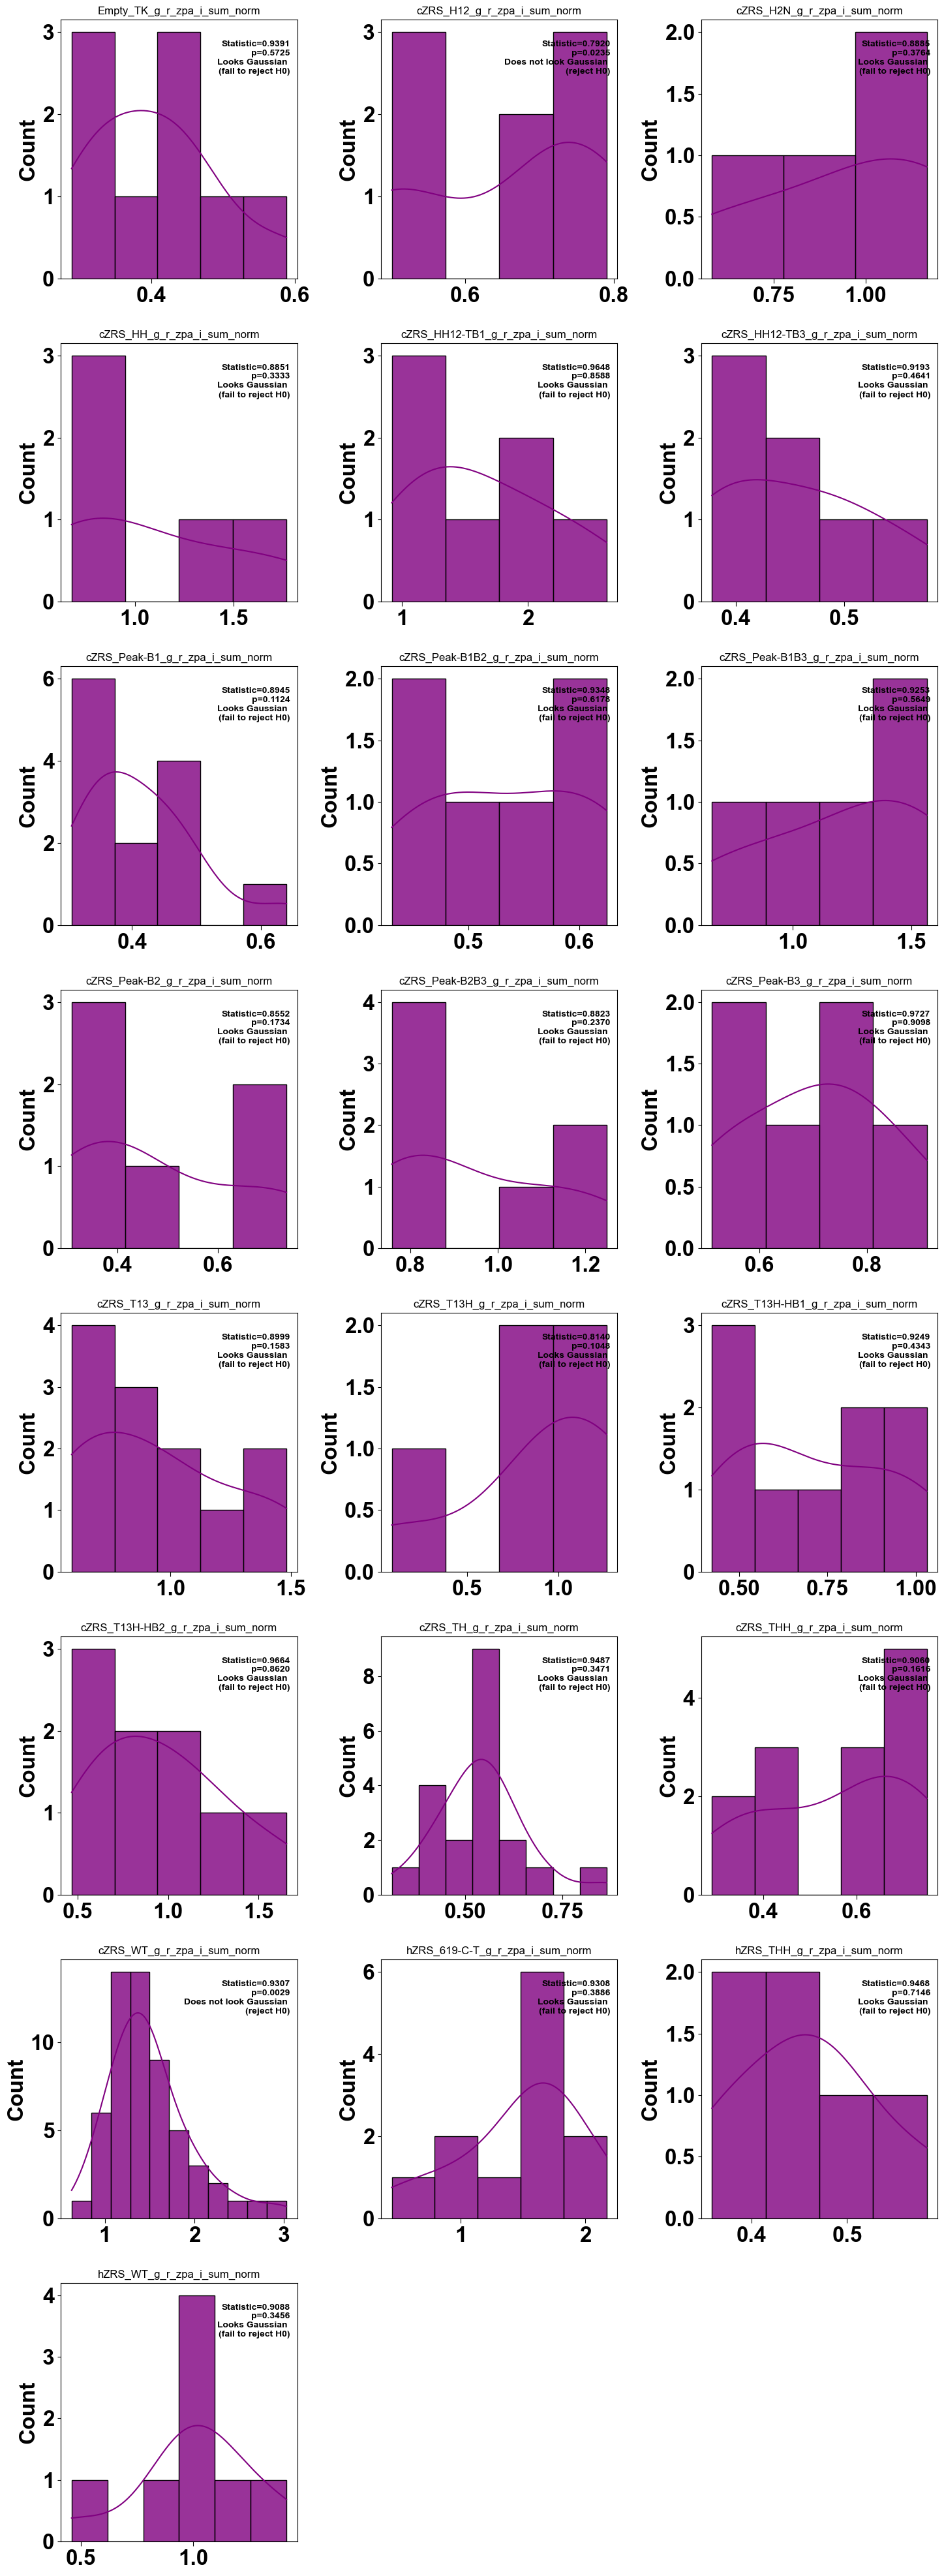

In [27]:
def descriptive_stats(df, cat_column, numeric_columns, alpha=0.05, num_cols=3, hist_colors=None):
    num_categories = len(df[cat_column].unique())
    num_rows = (num_categories + num_cols - 1) // num_cols
    
    result = []
    
    # Group the data by categorical variable
    grouped_df = df.groupby(cat_column)
    
    for i, column in enumerate(numeric_columns):
        # Create the subplots
        fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
        
        for j, (category, group) in enumerate(grouped_df):
            treatment_group = group[column]
            descriptive_stats = treatment_group.describe()
            shapiro_stat, shapiro_p = shapiro(treatment_group)

            interpretation = 'Distribution looks Gaussian (fail to reject H0)' if shapiro_p > alpha else 'Distribution does not look Gaussian (reject H0)'
            interp = 'Looks Gaussian \n(fail to reject H0)' if shapiro_p > alpha else 'Does not look Gaussian \n(reject H0)'

            row = {
                'Mutant Name': category,
                'Data Method': column,
                'Count': descriptive_stats['count'],
                'Mean': descriptive_stats['mean'],
                'Std': descriptive_stats['std'],
                'Min': descriptive_stats['min'],
                '25%': descriptive_stats['25%'],
                '50%': descriptive_stats['50%'],
                '75%': descriptive_stats['75%'],
                'Max': descriptive_stats['max'],
                'Alpha': alpha,
                'Shapiro W': shapiro_stat,
                'Shapiro p': shapiro_p,
                'Interpretation': interpretation
            }
            result.append(row)

            # Get the correct subplot index
            row_idx = j // num_cols
            col_idx = j % num_cols
            ax = axs[row_idx, col_idx]

            # Set histogram color if specified
            color_index = j % len(hist_colors) if hist_colors else 0
            color = hist_colors[color_index] if hist_colors else 'purple'

            sns.histplot(data=treatment_group, kde=True, color=color, alpha=0.8, ax=ax)
            ax.set_title(f'{category}_{column}', fontsize=12)
            ax.set_xlabel('')
            ax.text(0.97, 0.92, f'Statistic={shapiro_stat:.4f}\np={shapiro_p:.4f}\n{interp}',
                    fontsize=10, ha='right', va='top', transform=ax.transAxes)

        # Remove empty subplots
        if num_categories < num_rows * num_cols:
            for j in range(num_categories, num_rows * num_cols):
                axs.flat[j].set_visible(False)

        plt.tight_layout()
        plt.show()

    return pd.DataFrame(result)

# To make a figure title
#   fig.suptitle('Histograms with Shapiro-Wilk Test', fontsize=16)
#   plt.tight_layout()
#   plt.subplots_adjust(top=0.97)
#   plt.show()

result_df = descriptive_stats(df_raw, 'e_mut', num_columns)
result_df
result_df.to_csv('raw_descriptive_stats.csv', index=False)

Some groups are not normally distributed, we will address outliers and check again, but we will likely need a non-parametric test.

### 2.3.1 Visualize raw data with box and swarm plots

In [4]:
def box_swarm_plot(x, y, ptitle, order, mut_dict, df=df, fig=(12, 10), ylims=None, annotate=False, dunn_result_df=None, pair_list=False, box_color='mediumpurple', filename=None):
    plt.figure(figsize=(fig))
    plt.rcParams.update({'font.size': 24, 'font.weight':'bold', 'axes.labelweight':'bold', 'xtick.major.size': 5, 'font.family': 'Arial'}) # 16
    plt.tick_params(width=2)
    
    lw = 3 # 2
    PROPS = {
        'boxprops': {'facecolor': 'ghostwhite', 'edgecolor': box_color, 'linewidth': lw},
        'medianprops': {'color': 'crimson', 'linewidth': lw},
        'whiskerprops': {'color': box_color, 'linewidth': lw},
        'capprops': {'color': box_color, 'linewidth': lw}}

    ax = sns.boxplot(data=df, x=x, y=y, order=order, width=0.5, **PROPS)
    ax = sns.swarmplot(data=df, x=x, y=y, order=order, color='blueviolet', alpha=1)
    sns.despine(ax=ax,top=True,right=True)
    plt.setp(ax.spines.values(), linewidth=2)
    
    if pair_list:
        pairs=pair_list
    else: pairs=list(combinations(order, 2))

    if annotate:
        annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
        if annotate in ['t-test_ind', 't-test_welch', 't-test_paired', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal']:
            # Annotate with Standard Test Format
            annotator.configure(test=annotate, text_format='star', loc='inside',line_width=3).apply_and_annotate() #comparisons_correction='bonferroni'
        elif annotate in ['Dunn']: 
            p_values = [dunn_result_df.loc[pair] for pair in pairs]
            annotator.configure(text_format='star', loc='inside',line_width=3)
            annotator.set_pvalues_and_annotate(p_values)
        elif annotate in ['Tukey']:
            pairs = [(i[1]['group1'], i[1]['group2']) for i in tukey_result_df.iterrows() if
                (i[1]['group1'], i[1]['group2']) in pair_list or (i[1]['group2'], i[1]['group1']) in pair_list]
            p_values = [i[1]['p-adj'] for i in tukey_result_df.iterrows() if
                (i[1]['group1'], i[1]['group2']) in pair_list or (i[1]['group2'], i[1]['group1']) in pair_list]
            annotator.configure(text_format="star", loc="inside",line_width=3)
            annotator.set_pvalues_and_annotate(p_values)
        else: # Annotate with Custom Test
            custom_long_name = 'Kolmogorov-Smirnov Test'
            custom_short_name = 'KStest'
            custom_func = kstest
            custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
            annotator.reset_configuration()
            annotator.new_plot(ax, pairs, data=df, x=x, y=y, order=order)
            annotator.configure(test=custom_test, text_format='star',line_width=3).apply_and_annotate()

    
    label_list = [mut_dict[i] for i in order]
    plt.title(ptitle)
    ax.set_xticklabels(label_list) # label_list
    ax.set_xlabel('')
    if ylims != None: ax.set_ylim(ylims)
    ax.set_ylabel('') #Normalized Fluorescence
    if filename != None: plt.savefig(filename, dpi=500)
    else: plt.show()
    


# fig_1 = ['cZRS_WT', 'cZRS_Peak-B1', 'cZRS_Peak-B2', 'cZRS_Peak-B3', 'cZRS_Peak-B1B2', 'cZRS_Peak-B2B3', 'cZRS_Peak-B1B3', 'Empty_TK']
# fig_1_dict = {'cZRS_WT': 'FL', 'cZRS_Peak-B1': 'F1', 'cZRS_Peak-B2':'F2', 'cZRS_Peak-B3':'F3', 'cZRS_Peak-B1B2':'F1F2', 'cZRS_Peak-B2B3':'F2F3', 'cZRS_Peak-B1B3':'F1F3', 'Empty_TK':'Empty'}
# fig_1_pairs = [('cZRS_WT', 'cZRS_Peak-B1'),
#             ('cZRS_WT', 'cZRS_Peak-B2'),
#             ('cZRS_WT', 'cZRS_Peak-B3'),
#             ('cZRS_WT', 'cZRS_Peak-B1B2'),
#             ('cZRS_WT', 'cZRS_Peak-B2B3'),
#             ('cZRS_WT', 'cZRS_Peak-B1B3')
#         ]


# box_swarm_plot('e_mut', 'g_r_post_i_sum_norm', 'Fig 1, Raw Data', fig_1, fig_1_dict, df=df_raw, fig=(12, 10), ) #ylims=(0,3)


# fig_2 = ['cZRS_WT', 'cZRS_THH', 'cZRS_T13H-HB2', 'cZRS_T13H-HB1', 'cZRS_T13H', 'cZRS_HH12-TB3', 'cZRS_TH', 'cZRS_HH12-TB1', 'cZRS_HH', 'cZRS_H12', 'Empty_TK']
# fig_2_dict = {'cZRS_WT': 'WT', 'cZRS_THH':r'$\Delta$5', 'cZRS_T13H-HB2':'+Hx1', 'cZRS_T13H-HB1':'+Hx2', 'cZRS_T13H':'+Hx1Hx2', 'cZRS_HH12-TB3':'+E1', 'cZRS_TH':'+E2', 'cZRS_HH12-TB1':'+E3', 'cZRS_HH':'+E1E3', 'cZRS_H12': '+E1E2E3', 'Empty_TK':'Empty'}

# box_swarm_plot('e_mut', 'g_r_post_i_sum_norm', 'Fig 2, Raw Data', fig_2, fig_2_dict, df=df_raw, fig=(16, 8), ) #ylims=(0,3)


# cZRS = ['cZRS_WT', 'cZRS_THH', 'Empty_TK']
# hZRS = ['hZRS_WT', 'hZRS_THH', 'Empty_TK']
# hZRS_all = ['hZRS_WT', 'hZRS_THH', 'hZRS_619-C-T', 'Empty_TK']
# cZRS_v_hZRS = ['cZRS_WT', 'cZRS_THH', 'hZRS_WT', 'hZRS_THH', 'Empty_TK']
# fig_3_dict = {'cZRS_WT': 'cZRS WT',  'cZRS_THH':r'cZRS $\Delta$5', 'hZRS_WT': 'hZRS WT', 'hZRS_THH':r'hZRS $\Delta$5', 'hZRS_619-C-T': 'hZRS SNV 619 C/T','Empty_TK':'Empty'}

# box_swarm_plot('e_mut', 'g_r_post_i_sum_norm', 'Fig 3, Raw Data', hZRS, fig_3_dict, df=df_raw, fig=(10, 8), ) #ylims=(0,2.5)


There are a few possible outliers, so let's do an outlier test and see.

### 2.4 Outlier Test Comparison

In [29]:
"""
Grubbs' test for Outliers

Assumptions:
    Normal Distribution
    Hypothesis-based test that tests for only one outlier at a time 
        (not good for data with more than one outlier)
"""

def remove_outliers_Grubbs(df, columns, alpha=0.05):
    df_cleaned = df.copy()
    indices_to_drop = []
    
    for col in columns:
        values = df[col].values
        n = len(values)
        mean = np.mean(values)
        std = np.std(values)
        
        if n < 3:
            continue
        
        # Calculate Grubb's test statistic (Two-tailed)
        test_statistic = np.abs(values - mean) / std

        # Calculate Grubb's critical value
        t_value = stats.t.ppf(1 - alpha / (2 * n), n - 2)
        g_critical = (n - 1) / np.sqrt(n) * np.sqrt(t_value ** 2 / (n - 2 + t_value ** 2))

        # Find outliers
        outliers = np.where(test_statistic > g_critical)[0]
        indices_to_drop.extend(outliers)
    print(indices_to_drop)
    df_cleaned = df_cleaned.drop(indices_to_drop)
    
    return df_cleaned

# df_cleaned_grubbs = remove_outliers_Grubbs(df_raw, num_columns)
# df_cleaned_grubbs
# df_cleaned_grubbs.to_csv('df_cleaned_grubbs.csv', index=False)

# Returns rows:
# outliers_grubbs = []


In [30]:
"""
Z-Score Test for Outliers

Assumptions:
    Normal Distribution
    Mean-based
    Susceptible to extreme outliers
    Threshold is usually set at +/-3
"""

def remove_outliers_zscore(df, columns, threshold=3):
    df_cleaned = df.copy()
    indices_to_drop = []
    
    for col in columns:
        values = df[col].values
        z_score = stats.zscore(values)
        outliers= np.where(np.abs(z_score) > threshold)[0]
        indices_to_drop.extend(outliers)   
    print(indices_to_drop)
    df_cleaned = df_cleaned.drop(indices_to_drop)

    return df_cleaned


# df_cleaned_zscore = remove_outliers_zscore(df_raw, num_columns)
# df_cleaned_zscore
# df_cleaned_zscore.to_csv('df_cleaned_zscore.csv', index=False)

# Returns rows:
# outliers_z_score = []

In [31]:
"""
IQR Method
Assumptions: 
    Does NOT assume normal distribution
    The '1.5' is the range, it would be different for something like exponential data
    Is based on median, not mean
    Is robust against outlier influence

"""
# # For non-grouped data
# def remove_outliers_iqr(df, columns, multiplier=1.5): #Most common multiplier values are 1.5 followed by 1.7
#     df_cleaned = df.copy()
#     indices_to_drop = []
    
#     for col in columns:
#         values = df[col].values
#         q3, q1 = np.percentile(values, [75,25])
#         iqr = q3-q1 #Interquartile range
#         fence_low  = q1-multiplier*iqr
#         fence_high = q3+multiplier*iqr
#         outliers= np.where((values < fence_low) | (fence_high < values))[0]
#         indices_to_drop.extend(outliers)
        
#     print(indices_to_drop)
#     df_cleaned = df_cleaned.drop(indices_to_drop)

#     return df_cleaned

# def remove_outliers_iqr(df, cat_column, numeric_column, multiplier=1.5): #Most common multiplier values are 1.5 followed by 1.7
#     dfc = df.copy()
#     indices_to_drop = []
#     grouped_df = df.groupby(cat_column)
#     # for column in numeric_columns:
#     for i, (category, group) in enumerate(grouped_df):
#         indices_to_drop = []
#         values = group[numeric_column].values
#         q3, q1 = np.percentile(values, [75,25])
#         iqr = q3-q1 #Interquartile range
#         fence_low  = q1-multiplier*iqr
#         fence_high = q3+multiplier*iqr
#         outliers= np.where((values < fence_low) | (fence_high < values))[0]
#         # indices to drop.extend(outliers)
#         for o in outliers:
#             new_o = group[numeric_column].loc[o,'e_name'] # can't seem to apply this to the GroupBy() object
#             dfc.loc[grouped_df[numeric_column].transform(lambda x : (x==o)).eq(1)] # I'm getting stuck here
#             indices_to_drop.append(new_o)
#         print(f'For {category}, drop: {indices_to_drop}')
#     df_cleaned = df_cleaned.drop(indices_to_drop)
#     return df_cleaned

def remove_outliers_iqr(df, cat_column, numeric_column, multiplier=1.5): #Most common multiplier values are 1.5 followed by 1.7
    dfc = df.copy()
    # Uses the transform() methods which alters the original df, could also use the filter() method which would return a new, filtered df.
    df2 = dfc[dfc.groupby(cat_column)[numeric_column].transform(lambda x : ((x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1))] # Shouldn't it be 0.75 and 0.25 quantiles times IQR?
    df_cleaned = df.copy()
    df_cleaned[numeric_column] = df2[numeric_column] 
    df_cleaned = df_cleaned.dropna(axis=0)
    return df_cleaned

# df_cleaned_iqr = remove_outliers_iqr(df_raw, 'e_mut', num_columns)
# df_cleaned_iqr
# df_cleaned_iqr.to_csv('df_cleaned_iqr.csv', index=False)



In [32]:
"""
Median Absolute Deviation (MAD) Z-Score Method
Assumptions: 
    Data are independent and identically distributed (iid)
    Unimodal distribution
    Most data points are not outliers

"""


def remove_outliers_mad(df, cat_column, numeric_column, threshold=3.5): #Threshold can be 3.0 or 3.5
    df_cleaned = df.copy()
    indices_to_drop = []
    
    grouped_df = df.groupby(cat_column)

    # for column in numeric_columns:
    for i, (category, group) in enumerate(grouped_df):
        print(category, group)
    #     values = group[numeric_column].values
    #     median = np.median(values)
    #     mad = median_abs_deviation(values)

    #     #This way of using thresholds is more stringent
    #     # outlier_threshold = threshold * mad
    #     # outliers = np.where(np.abs(values - median) > outlier_threshold)[0]

    #     #This way of using thresholds is less stringent, but seems closer to what is in the literature
    #     z_scores = 0.6745 * (values - median) / mad
    #     outliers = np.where(np.abs(z_scores) > threshold)[0]
    #     indices_to_drop.extend(outliers)
    # print(indices_to_drop)
    # df_cleaned = df_cleaned.drop(indices_to_drop)

    # return df_cleaned


# df_cleaned_mad = remove_outliers_mad(df_raw, 'e_mut', num_columns)
# df_cleaned_mad
# df_cleaned_mad.to_csv('df_cleaned_mad.csv', index=False)

# Returns rows:
# mad_stringent_3_5 = []
# mad_not_stringent_3_5 = []
# mad_stringent_3_0 = []
# mad_not_stringent_3_0 = []

Some groups are non-normally distributed, so the IQR or MAD z-score methods are best.

### 2.5 Check distribution of cleaned data with histograms and Shapiro-Wilk test 

In [33]:
# df_cleaned_iqr = pd.DataFrame(pd.read_csv('df_cleaned_iqr.csv'))
# result_df = descriptive_stats(df_cleaned_iqr, 'e_mut', num_columns)
# result_df
# result_df.to_csv('cleaned_iqr_descriptive_stats.csv', index=False)

Dropping outliers greatly reduces the n of many groups. I think it would be safer to favor statistical power over the impact of potential outliers so will either not drop, or figure out a replacement method.

### 2.6 Visualize cleaned data with box and swarm plots

In [34]:
# fig_1 = ['cZRS_WT', 'cZRS_Peak-B1', 'cZRS_Peak-B2', 'cZRS_Peak-B3', 'cZRS_Peak-B1B2', 'cZRS_Peak-B2B3', 'cZRS_Peak-B1B3', 'Empty_TK']
# fig_1_dict = {'cZRS_WT': 'FL', 'cZRS_Peak-B1': 'F1', 'cZRS_Peak-B2':'F2', 'cZRS_Peak-B3':'F3', 'cZRS_Peak-B1B2':'F1F2', 'cZRS_Peak-B2B3':'F2F3', 'cZRS_Peak-B1B3':'F1F3', 'Empty_TK':'Empty'}

# box_swarm_plot('e_mut', 'g_r_post_i_sum_norm', 'Fig 1, Cleaned Data', fig_1, fig_1_dict, df=df_cleaned_iqr, fig=(12, 10), ylims=(0,3))


# fig_2 = ['cZRS_WT', 'cZRS_THH', 'cZRS_T13H-HB2', 'cZRS_T13H-HB1', 'cZRS_T13H', 'cZRS_HH12-TB3', 'cZRS_TH', 'cZRS_HH12-TB1', 'cZRS_HH', 'cZRS_H12', 'Empty_TK']
# fig_2_dict = {'cZRS_WT': 'WT', 'cZRS_THH':r'$\Delta$5', 'cZRS_T13H-HB2':'+Hx1', 'cZRS_T13H-HB1':'+Hx2', 'cZRS_T13H':'+Hx1Hx2', 'cZRS_HH12-TB3':'+E1', 'cZRS_TH':'+E2', 'cZRS_HH12-TB1':'+E3', 'cZRS_HH':'+E1E3', 'cZRS_H12': '+E1E2E3', 'Empty_TK':'Empty'}

# box_swarm_plot('e_mut', 'g_r_post_i_sum_norm', 'Fig 2, Cleaned Data', fig_2, fig_2_dict, df=df_cleaned_iqr, fig=(16, 8), ylims=(0,3))


# cZRS = ['cZRS_WT', 'cZRS_THH', 'Empty_TK']
# hZRS = ['hZRS_WT', 'hZRS_THH', 'Empty_TK']
# hZRS_all = ['hZRS_WT', 'hZRS_THH', 'hZRS_619-C-T', 'Empty_TK']
# cZRS_v_hZRS = ['cZRS_WT', 'cZRS_THH', 'hZRS_WT', 'hZRS_THH', 'Empty_TK']
# fig_3_dict = {'cZRS_WT': 'cZRS WT',  'cZRS_THH':r'cZRS $\Delta$5', 'hZRS_WT': 'hZRS WT', 'hZRS_THH':r'hZRS $\Delta$5', 'hZRS_619-C-T': 'hZRS SNV 619 C/T','Empty_TK':'Empty'}

# box_swarm_plot('e_mut', 'g_r_post_i_sum_norm', 'Fig 3, Cleaned Data', hZRS, fig_3_dict, df=df_cleaned_iqr, fig=(10, 8), ylims=(0,2.5))


#### Descriptive Stat Conclusions
Dropping outliers results in very small N for some groups. I will not drop outliers, unless I can re-work the code to use an outlier replacement method.

## 3.0 Comparitive Statistics

### 3.1 Create separate dataframes for each analysis

In [5]:
fig1_fragments_df = pd.DataFrame(pd.read_csv('fig1_fragments_data.csv'))
fig2_delta5_df = pd.DataFrame(pd.read_csv('fig2_delta5_data.csv'))
fig3_hox_df = pd.DataFrame(pd.read_csv('fig3_hox_data.csv'))
fig3_ebox_df = pd.DataFrame(pd.read_csv('fig3_ebox_data.csv'))
fig4_hzrs_df = pd.DataFrame(pd.read_csv('fig4_hzrs_data.csv'))

In [80]:
def compare_groups(df, cat_column, numeric_column, compare_list):
    # This function compares ALL groups within the given df, so p-val correction is severe!!! Make sure to only include groups that you want as part of the analysis
    groups = []
    # for col in columns:
    #     groups.append(df[col])
    grouped_df = df.groupby(cat_column)
    # for column in numeric_columns:
    for i, (category, group) in enumerate(grouped_df):
        if category in compare_list:
            values = group[numeric_column].values
            groups.append(values)
    # Kruskal-Wallis H Test for independent samples
    # Note that the assumptions require groups be no smaller than 5 measurements (embryos in our case)
    h_statistic, p_value_kruskal = kruskal(*groups) #Pass groups as args to run Kruskal-Wallis on all groups as omnibus test
    print(f'Kruskal-Wallis H statistic: {h_statistic}')
    print(f'Kruskal-Wallis p value: {p_value_kruskal}')

    # Dunn's Test (post hoc test)
    if p_value_kruskal < 0.05:
        result_df = sp.posthoc_dunn(df,  group_col=cat_column, val_col=numeric_column, p_adjust='Bonferroni') # Bonferroni is conservative and may increase false negatives
        return result_df



### 3.2.1 Figure 1: Fragment Analysis


In [81]:
fig_1 = ['cZRS_WT', 'cZRS_Peak-B1', 'cZRS_Peak-B2', 'cZRS_Peak-B3', 'cZRS_Peak-B1B2', 'cZRS_Peak-B2B3', 'cZRS_Peak-B1B3', 'Empty_TK']
fig1_dunn_result_df = compare_groups(fig1_fragments_df, 'e_mut', 'g_r_post_i_sum_norm', fig_1)
fig1_dunn_result_df
# fig1_dunn_result_df.to_csv('fig1_dunn_results.csv', index=False)

Kruskal-Wallis H statistic: 55.49271978880938
Kruskal-Wallis p value: 3.686124198566306e-10


,cZRS_Peak-B1,cZRS_Peak-B1B2,cZRS_Peak-B1B3,cZRS_Peak-B2,cZRS_Peak-B2B3,cZRS_Peak-B3,cZRS_WT
cZRS_Peak-B1,1.000000e+00,1.000000,0.055037,1.000000,0.137921,1.000000,2.571358e-08
cZRS_Peak-B1B2,1.000000e+00,1.000000,0.666112,1.000000,1.000000,1.000000,4.656351e-03
cZRS_Peak-B1B3,5.503711e-02,0.666112,1.000000,0.497939,1.000000,1.000000,1.000000e+00
cZRS_Peak-B2,1.000000e+00,1.000000,0.497939,1.000000,1.000000,1.000000,2.445282e-03
cZRS_Peak-B2B3,1.379214e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
cZRS_Peak-B3,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,2.799263e-01
cZRS_WT,2.571358e-08,0.004656,1.000000,0.002445,1.000000,0.279926,1.000000e+00


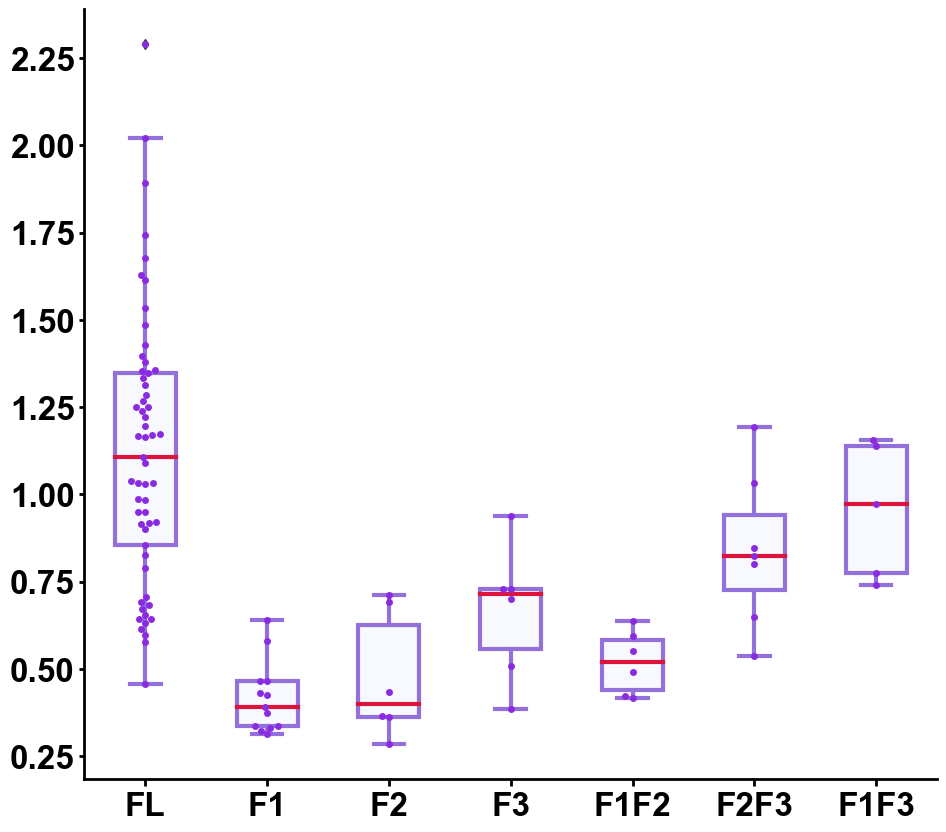

In [82]:
fig_1 = ['cZRS_WT', 'cZRS_Peak-B1', 'cZRS_Peak-B2', 'cZRS_Peak-B3', 'cZRS_Peak-B1B2', 'cZRS_Peak-B2B3', 'cZRS_Peak-B1B3'] # 'Empty_TK'
fig_1_dict = {'cZRS_WT': 'FL', 'cZRS_Peak-B1': 'F1', 'cZRS_Peak-B2':'F2', 'cZRS_Peak-B3':'F3', 'cZRS_Peak-B1B2':'F1F2', 'cZRS_Peak-B2B3':'F2F3', 'cZRS_Peak-B1B3':'F1F3', 'Empty_TK':'Empty'}
fig_1_pairs = [
                ('cZRS_WT', 'cZRS_Peak-B3'),
                ('cZRS_WT', 'cZRS_Peak-B1B3'),
                ('cZRS_WT', 'cZRS_Peak-B1'),
                ('cZRS_WT', 'cZRS_Peak-B1B2'),
                ('cZRS_WT', 'cZRS_Peak-B2'),
                ('cZRS_WT', 'cZRS_Peak-B2B3'),
        ]

box_swarm_plot('e_mut', 'g_r_post_i_sum_norm', '', fig_1, fig_1_dict, df=df_raw, fig=(11, 10),  dunn_result_df=fig1_dunn_result_df, pair_list=fig_1_pairs, filename='Fig1_Fragments_boxplot.png') #annotate='Dunn',


### 3.2.2 Figure 1.5: Further Fragment Analysis

In [83]:
fig1_5_fragments_df = pd.DataFrame(pd.read_csv('fig1_5_fragments_data.csv'))
fig_1_5 = ['cZRS_Peak-B3','cZRS_Peak-B2B3', 'cZRS_Peak-B1B3']
fig1_5_dunn_result_df = compare_groups(fig1_5_fragments_df, 'e_mut', 'g_r_post_i_sum_norm', fig_1_5)
fig1_5_dunn_result_df
# fig1_5_dunn_result_df.to_csv('fig1_5_dunn_results.csv', index=False)

Kruskal-Wallis H statistic: 5.215873015873022
Kruskal-Wallis p value: 0.0736864383732685


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

cZRS_Peak-B3 vs. cZRS_Peak-B2B3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.807e-01 U_stat=1.100e+01
cZRS_Peak-B3 vs. cZRS_Peak-B1B3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.732e-02 U_stat=2.000e+00


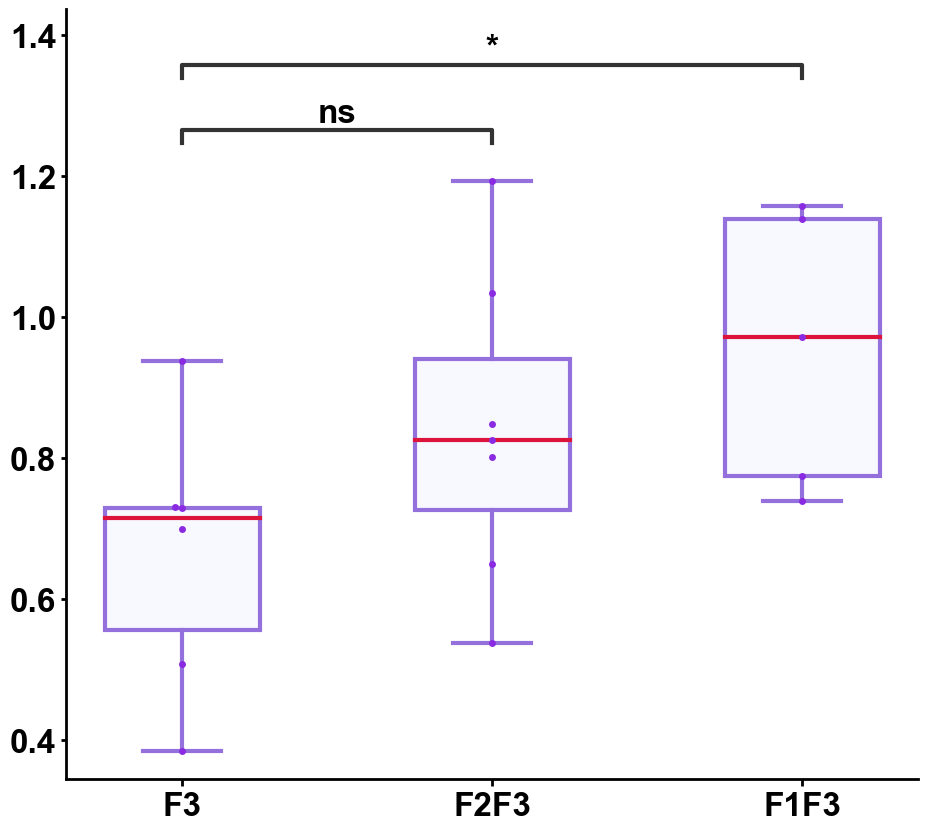

In [84]:
fig_1_5 = ['cZRS_Peak-B3','cZRS_Peak-B2B3', 'cZRS_Peak-B1B3']
fig_1_5_dict = {'cZRS_WT': 'FL', 'cZRS_Peak-B1': 'F1', 'cZRS_Peak-B2':'F2', 'cZRS_Peak-B3':'F3', 'cZRS_Peak-B1B2':'F1F2', 'cZRS_Peak-B2B3':'F2F3', 'cZRS_Peak-B1B3':'F1F3', 'Empty_TK':'Empty'}
fig_1_5_pairs = [
                ('cZRS_Peak-B3', 'cZRS_Peak-B1B3'),
                ('cZRS_Peak-B3', 'cZRS_Peak-B2B3'),
        ]

box_swarm_plot('e_mut', 'g_r_post_i_sum_norm', '', fig_1_5, fig_1_5_dict, df=df_raw, fig=(11, 10), pair_list=fig_1_5_pairs, annotate='Mann-Whitney', filename='Fig1_5_Fragments_boxplot.png') #annotate='Dunn',

### 3.3 Figure 2: Delta 5 analysis

In [68]:
fig_2 = ['cZRS_WT', 'cZRS_THH', 'Empty_TK']
fig2_dunn_result_df = compare_groups(fig2_delta5_df, 'e_mut', 'g_r_post_i_sum_norm', fig_2)
fig2_dunn_result_df
# fig2_dunn_result_df.to_csv('fig2_dunn_results.csv', index=False)

Kruskal-Wallis H statistic: 42.14448316506946
Kruskal-Wallis p value: 7.054102393728171e-10


,Empty_TK,cZRS_THH,cZRS_WT
Empty_TK,1.000000,1.000000,0.000002
cZRS_THH,1.000000,1.000000,0.000004
cZRS_WT,0.000002,0.000004,1.000000


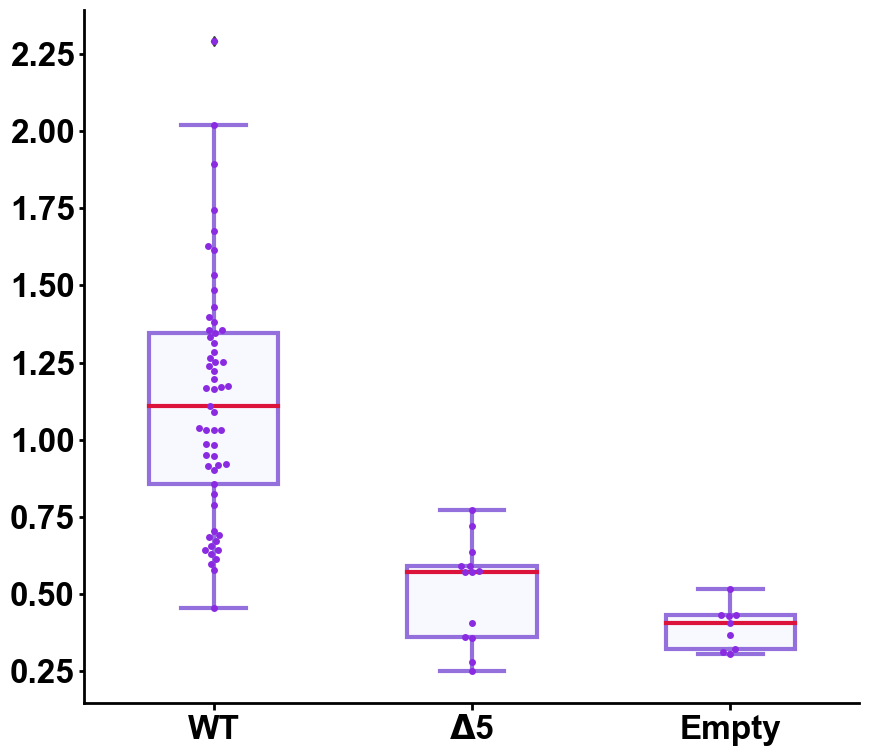

In [69]:
fig_2 = ['cZRS_WT', 'cZRS_THH', 'Empty_TK']
fig_2_dict = {'cZRS_WT': 'WT', 'cZRS_THH':r'$\Delta$5', 'cZRS_T13H-HB2':'+Hx1', 'cZRS_T13H-HB1':'+Hx2', 'cZRS_T13H':'+Hx1Hx2', 'cZRS_HH12-TB3':'+E1', 'cZRS_TH':'+E2', 'cZRS_HH12-TB1':'+E3', 'cZRS_HH':'+E1E3', 'cZRS_H12': '+E1E2E3', 'Empty_TK':'Empty'}
fig_2_pairs = [
                ('cZRS_WT', 'cZRS_THH'),
                ('cZRS_WT', 'Empty_TK'),
                ('cZRS_THH', 'Empty_TK')
        ]

box_swarm_plot('e_mut', 'g_r_post_i_sum_norm', '', fig_2, fig_2_dict, df=df_raw, fig=(10, 9), dunn_result_df=fig2_dunn_result_df, pair_list=fig_2_pairs, filename='Fig2_delta5_boxplot.png') #annotate='Dunn',

### 3.4 Figure 3: Hox and E-box analysis

In [70]:
fig_3_hox = ['cZRS_WT', 'cZRS_THH', 'cZRS_T13H-HB2', 'cZRS_T13H-HB1', 'cZRS_T13H'] # 'Empty_TK'
fig3_hox_dunn_result_df = compare_groups(fig3_hox_df, 'e_mut', 'g_r_zpa_i_sum_norm', fig_3_hox)
fig3_hox_dunn_result_df
# fig3_hox_dunn_result_df.to_csv('fig3_hox_dunn_results.csv', index=False)

Kruskal-Wallis H statistic: 51.685219877915756
Kruskal-Wallis p value: 1.605173000112307e-10


,cZRS_HH,cZRS_T13H,cZRS_T13H-HB1,cZRS_T13H-HB2,cZRS_THH,cZRS_WT
cZRS_HH,1.000000,1.000000,1.000000,1.000000,5.009347e-01,1.000000e+00
cZRS_T13H,1.000000,1.000000,1.000000,1.000000,1.000000e+00,3.042391e-01
cZRS_T13H-HB1,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.889963e-04
cZRS_T13H-HB2,1.000000,1.000000,1.000000,1.000000,7.566282e-01,6.504099e-02
cZRS_THH,0.500935,1.000000,1.000000,0.756628,1.000000e+00,1.705215e-08
cZRS_WT,1.000000,0.304239,0.000189,0.065041,1.705215e-08,1.000000e+00


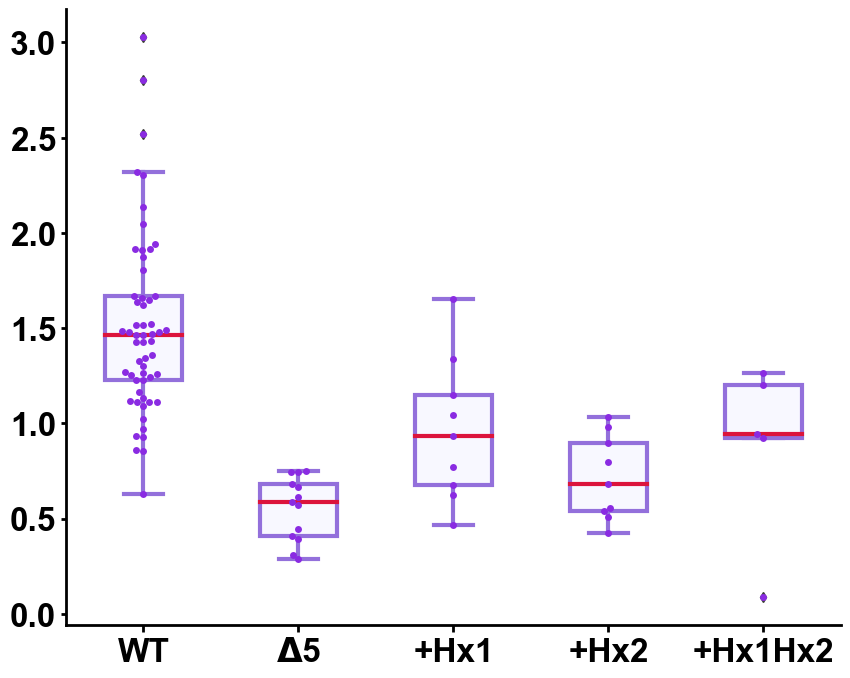

In [71]:
fig_3_dict = {'cZRS_WT': 'WT', 'cZRS_THH':r'$\Delta$5', 'cZRS_T13H-HB2':'+Hx1', 'cZRS_T13H-HB1':'+Hx2', 'cZRS_T13H':'+Hx1Hx2', 'cZRS_HH12-TB3':'+E1', 'cZRS_TH':'+E2', 'cZRS_HH12-TB1':'+E3', 'cZRS_HH':'+E1E3', 'cZRS_H12': '+E1E2E3', 'Empty_TK':'Empty'}
fig_3_hox_pairs = [
                ('cZRS_WT', 'cZRS_THH'),
                ('cZRS_WT', 'cZRS_T13H-HB2'),
                ('cZRS_WT', 'cZRS_T13H-HB1'),
                ('cZRS_WT', 'cZRS_T13H')
        ]

box_swarm_plot('e_mut', 'g_r_zpa_i_sum_norm', '', fig_3_hox, fig_3_dict, df=df_raw, fig=(10, 8), dunn_result_df=fig3_hox_dunn_result_df, pair_list=fig_3_hox_pairs, filename='Fig3_hox_boxplot.png') #annotate='Dunn',

In [72]:
fig_3_ebox = ['cZRS_WT', 'cZRS_THH', 'cZRS_HH12-TB3', 'cZRS_TH', 'cZRS_HH12-TB1', 'cZRS_HH', 'cZRS_H12'] # 'Empty_TK'
fig3_ebox_dunn_result_df = compare_groups(fig3_ebox_df, 'e_mut', 'g_r_post_i_sum_norm', fig_3_ebox)
fig3_ebox_dunn_result_df
# fig3_ebox_dunn_result_df.to_csv('fig3_ebox_dunn_results.csv', index=False)

Kruskal-Wallis H statistic: 71.6975109061056
Kruskal-Wallis p value: 1.833237377272776e-13


,cZRS_H12,cZRS_HH,cZRS_HH12-TB1,cZRS_HH12-TB3,cZRS_TH,cZRS_THH,cZRS_WT
cZRS_H12,1.000000,1.000000,0.024581,1.000000,1.000000e+00,1.000000,1.856378e-02
cZRS_HH,1.000000,1.000000,1.000000,0.703199,1.000000e+00,1.000000,1.000000e+00
cZRS_HH12-TB1,0.024581,1.000000,1.000000,0.000542,1.227067e-04,0.000611,1.000000e+00
cZRS_HH12-TB3,1.000000,0.703199,0.000542,1.000000,1.000000e+00,1.000000,1.097458e-04
cZRS_TH,1.000000,1.000000,0.000123,1.000000,1.000000e+00,1.000000,3.566124e-08
cZRS_THH,1.000000,1.000000,0.000611,1.000000,1.000000e+00,1.000000,1.236908e-05
cZRS_WT,0.018564,1.000000,1.000000,0.000110,3.566124e-08,0.000012,1.000000e+00


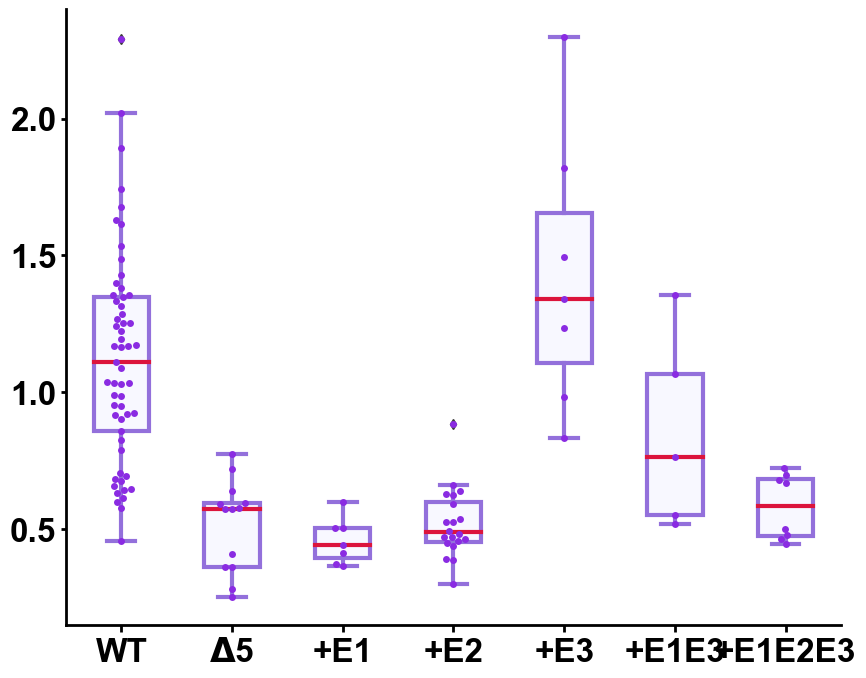

In [74]:
fig_3_dict = {'cZRS_WT': 'WT', 'cZRS_THH':r'$\Delta$5', 'cZRS_T13H-HB2':'+Hx1', 'cZRS_T13H-HB1':'+Hx2', 'cZRS_T13H':'+Hx1Hx2', 'cZRS_HH12-TB3':'+E1', 'cZRS_TH':'+E2', 'cZRS_HH12-TB1':'+E3', 'cZRS_HH':'+E1E3', 'cZRS_H12': '+E1E2E3', 'Empty_TK':'Empty'}
fig_3_ebox_pairs = [
                ('cZRS_WT', 'cZRS_HH12-TB1'),
                ('cZRS_WT', 'cZRS_THH'),
                ('cZRS_WT', 'cZRS_HH12-TB3'),
                ('cZRS_WT', 'cZRS_TH'),
                ('cZRS_HH12-TB1', 'cZRS_H12'),
        ]

box_swarm_plot('e_mut', 'g_r_post_i_sum_norm', '', fig_3_ebox, fig_3_dict, df=df_raw, fig=(10, 8), dunn_result_df=fig3_ebox_dunn_result_df, pair_list=fig_3_ebox_pairs, filename='Fig3_ebox_boxplot.png') #annotate='Dunn',

### 3.5 Figure 4 Human ZRS Analysis

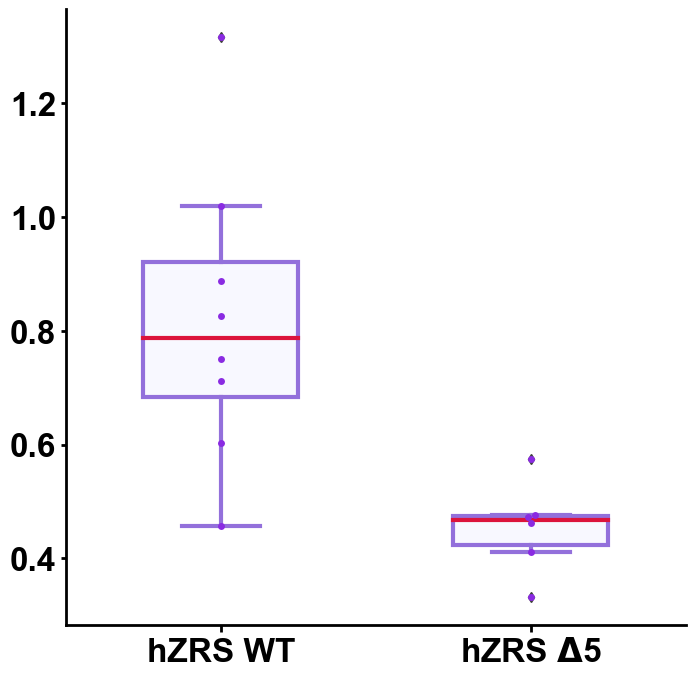

In [63]:
hZRS2 = ['hZRS_WT', 'hZRS_THH'] # 'Empty_TK'
fig_4_pairs = [
                ('hZRS_WT', 'hZRS_THH'),
                # ('hZRS_WT', 'Empty_TK'),
                # ('hZRS_THH', 'Empty_TK')
        ]

fig_4_dict = {'cZRS_WT': 'cZRS WT',  'cZRS_THH':r'cZRS $\Delta$5', 'hZRS_WT': 'hZRS WT', 'hZRS_THH':r'hZRS $\Delta$5', 'hZRS_619-C-T': 'hZRS SNV 619 C/T','Empty_TK':'Empty'}

box_swarm_plot('e_mut', 'g_r_post_i_sum_norm', '', hZRS2, fig_4_dict, df=df_raw, fig=(8, 8), pair_list=fig_4_pairs, filename='Fig4_hZRS_boxplot.png') #annotate='Mann-Whitney',


## Conclusions

We used the Shapiro-Wilk test to evaluate distribution and found that some groups were non-normally distributed. We checked for outliers using the IQR method, but decided not to remove outliers as it would decrease the N of some groups to the point that they would need to be omitted from analysis. For each analysis we preformed an omnibus Kruskal-Wallis test to determine if there were differenences between groups (p<=0.05). We then performed Dunn's Multiple Comparison Test with Bonferroni Correction. P values reported are the Bonferroni-corrected p values.